In [30]:
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# opening dataset
airbnb = pd.read_csv('../data/AB_NYC_2019.csv', sep=',', decimal='.')

### Examining of data structure and features

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# amount of null values per column
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# finding duplicated values
airbnb.duplicated().sum()

0

In [7]:
# removing sensitive (eg. name, document) or non relevant data
airbnb.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(airbnb.columns)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [8]:
# replacing null valeus of "reviews_per_month" by zero
airbnb['reviews_per_month'].fillna(0, inplace=True)

# checking
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Categorical data
### - Host info

In [9]:
# max listing bay same host
airbnb['calculated_host_listings_count'].max()

327

In [10]:
print('number of unique host: ', len(airbnb['host_id'].unique()))
airbnb['host_id'].value_counts()

number of unique host:  37457


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

### - Neighbourhood info

In [11]:
# number of neighbourhood groups in ascending order of quantity
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
# number of different neighbourhood
len(airbnb['neighbourhood'].unique())

221

### - Room type info

In [13]:
# number of room types in ascending order of quantity
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

## Numerical data

In [14]:
airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Searching for wrong data:
- max price of 10000 dolars one night?
- min price of 0 dolars?
- max nights of 1.250 days?
- min zero days available in the year?

Later we will need to work in these problems

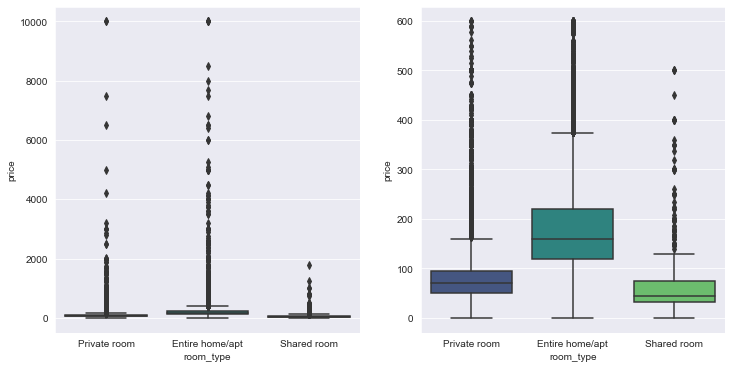

In [52]:
# Price by room type
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(data=airbnb, x='room_type', y='price', palette='viridis', ax=ax1)
sns.boxplot(data=airbnb.loc[airbnb['price'] < 600], x='room_type', y='price', palette='viridis', ax=ax2)

#TODO: clean outliers - remove or replace?

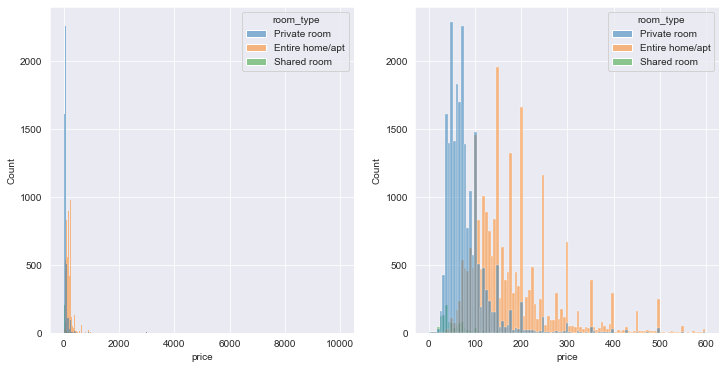

In [50]:
# Price distribution
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))

sns.histplot(airbnb, x='price', hue='room_type', ax=ax1)
sns.histplot(airbnb.loc[airbnb['price'] < 600], x='price', hue='room_type', ax=ax2);

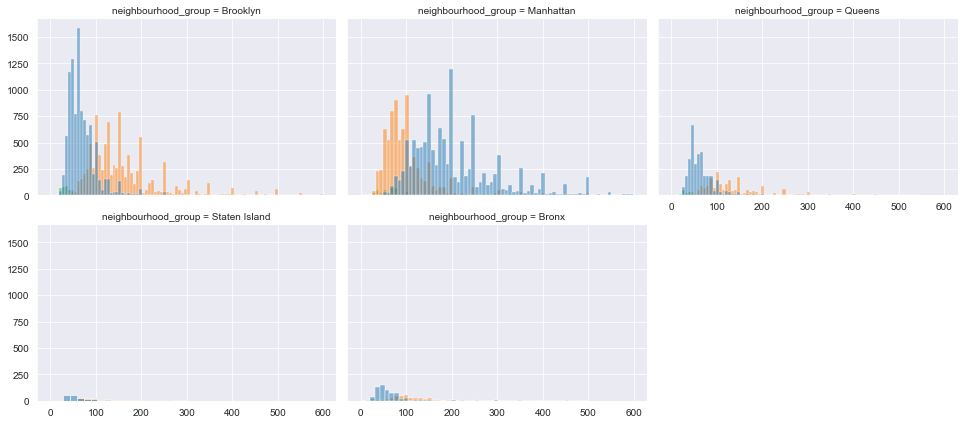

In [67]:
# Price x Neighbourhood Group
g = sns.FacetGrid(airbnb.loc[airbnb['price'] < 600], col='neighbourhood_group', col_wrap=3, height=3, aspect=1.5)
g.map_dataframe(sns.histplot, x='price', hue='room_type');

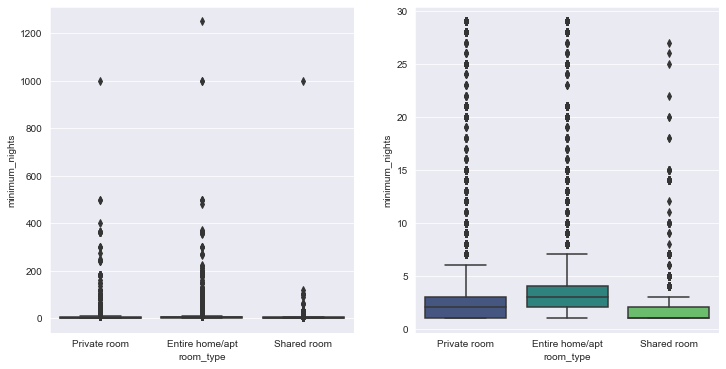

In [70]:
# Minimum nights by room type
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(data=airbnb, x='room_type', y='minimum_nights', palette='viridis', ax=ax1)
sns.boxplot(data=airbnb.loc[airbnb['minimum_nights'] < 30], x='room_type', y='minimum_nights', palette='viridis', ax=ax2);

#TODO: clean outliers - remove or replace?

### Data Cleaning